# RF TreeSHAP Visualizer - Robust Final Version

## 📖 Key Fix: SHAP-Based Filtering

**Problem Solved**: RDKit's `Descriptors.fr_*()` functions use different SMARTS patterns internally than `FG_SMARTS` dictionary!


- ✓ `FG_SMARTS['fr_phos_acid']` matches **2 phosphates**!



**New Approach**: Filter to features with **SHAP ≠ 0** → **Robust!**

---

## ✅ Features

**Clear Prediction Output**
- Shows Active/Inactive (threshold: 0.5)
- Displays probability
- Number of ensemble models

**Robust Color Logic (CNN/RGCN Style)**
- p95 percentile normalization (robust to outliers)
- Gamma correction (0.6) boosts mid-range intensities
- NO threshold - colors all non-zero attributions
- Attribution > 0 → Blue gradient (supports activity)
- Attribution < 0 → Orange gradient (opposes activity)

**ROBUST Filtering (FIXED!)**
- ✅ Filters by **SHAP values** (not descriptor values)
- ✅ Maps using `FG_SMARTS` patterns (works even if RDKit descriptor=0)
- ✅ Shows mismatches between RDKit descriptors and SMARTS

**TreeSHAP Ensemble**
- Averaged across all ensemble models
- Probability-space SHAP values
- 85 functional group features

---

## 🔧 Technical Details

### Why This Matters:

RDKit has **85 fragment descriptor functions** (`fr_Al_COO`, `fr_phos_acid`, etc.) that calculate feature counts.

**The Problem**:
- These functions use **internal SMARTS** patterns
- The `FG_SMARTS` dictionary has **different patterns** (for visualization)
- They don't always agree!





---

## 🚀 How to Use

1. **Run Cell 2** (Setup - once per session)
2. **Run Cell 4** (Paste SMILES and visualize)

---

## 📂 Required Files

- `RF_XAI_activity_pairs.py` (core implementation)
- `rf_simple_visualizer.py` (wrapper - FIXED with SHAP-based filtering)
- `best_models.json` (ensemble selection)
- `SA_FG_fragments.csv` (training data)
- `model_checkpoints/` (CV models)

---

**Ready?** ⬇️ Run Cell 2!

In [ ]:


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Import the updated visualizer (with ROBUST SHAP-based filtering)
from rf_simple_visualizer import visualize_rf_xai
import matplotlib.pyplot as plt

print("\n" + "="*70)
print("✓ Setup complete!")
print("="*70)
print("\nRobust features in this version:")
print("  ✓ FIXED: SHAP-based filtering (not descriptor-based)")
print("  ✓ ROBUST: p95 percentile normalization (like CNN/RGCN)")
print("  ✓ ROBUST: No threshold - colors all non-zero attributions")
print("  ✓ ROBUST: Gamma correction (0.6) boosts mid-range")
print("  ✓ Shows mismatches between RDKit descriptors and SMARTS")
print("  ✓ TreeSHAP averaged across ensemble")
print("="*70)

Successfully imported from RF_XAI_activity_pairs.py

✓ Setup complete!

Robust features in this version:
  ✓ FIXED: SHAP-based filtering (not descriptor-based)
  ✓ ROBUST: p95 percentile normalization (like CNN/RGCN)
  ✓ ROBUST: No threshold - colors all non-zero attributions
  ✓ ROBUST: Gamma correction (0.6) boosts mid-range
  ✓ Shows mismatches between RDKit descriptors and SMARTS
  ✓ TreeSHAP averaged across ensemble


---

# 📝 Paste SMILES Here

⬇️ Run the cell below!

**Test with bisphosphonate fluoroquinolone:**
```
COC1=C(N2CCN(C(=O)CC(P(=O)(O)O)P(=O)(O)O)C(C)C2)C(F)=CC2=C1N(C1CC1)C=C(C(=O)O)C2=O
```

---


Analyzing: [N-]=[N+]=NC[C@H]1CN(C2=CC=C(N3CCOCC3)C(F)=C2)C(=O)O1

PREDICTION: Inactive
Probability: 0.2110 (threshold: 0.5)
Ensemble models: 5

Computing TreeSHAP across 5 ensemble models...
Features with non-zero SHAP values: 74/85
  - Detected by RDKit descriptors: 11
  - SHAP-only (may use different patterns): 63

Molecule Visualization (Atom Attributions - TreeSHAP)


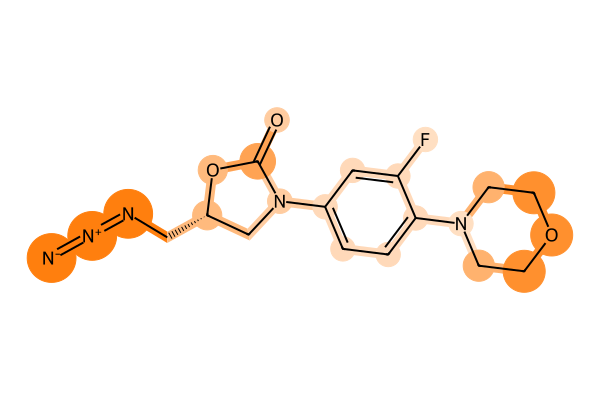

🔵 Blue = Supports activity | 🟠 Orange = Opposes activity


✓ Visualization complete!


In [9]:


# Paste your SMILES:
smiles = "[N-]=[N+]=NC[C@H]1CN(C2=CC=C(N3CCOCC3)C(F)=C2)C(=O)O1"  #  Example SMILES

# Optional settings
top_k = 10       # Number of top features to show
figsize = (14, 8)  # Figure size

# ============================================================================
# Generate visualization
# ============================================================================

print(f"\nAnalyzing: {smiles}\n")

fig = visualize_rf_xai(smiles, top_k=top_k, figsize=figsize)

if fig:
    plt.show()
    print("\n" + "="*70)
    print("✓ Visualization complete!")
    print("="*70)
else:
    print("\n❌ Error processing SMILES")